## project health care
### 1. Setting Up Your Environment
First, make sure the required libraries are installed. they were installed using pip:

*pip install pandas numpy matplotlib seaborn*

### 2. Data Generation
 simulate some IoT sensor data, including temperature, motion detection, and timestamps.

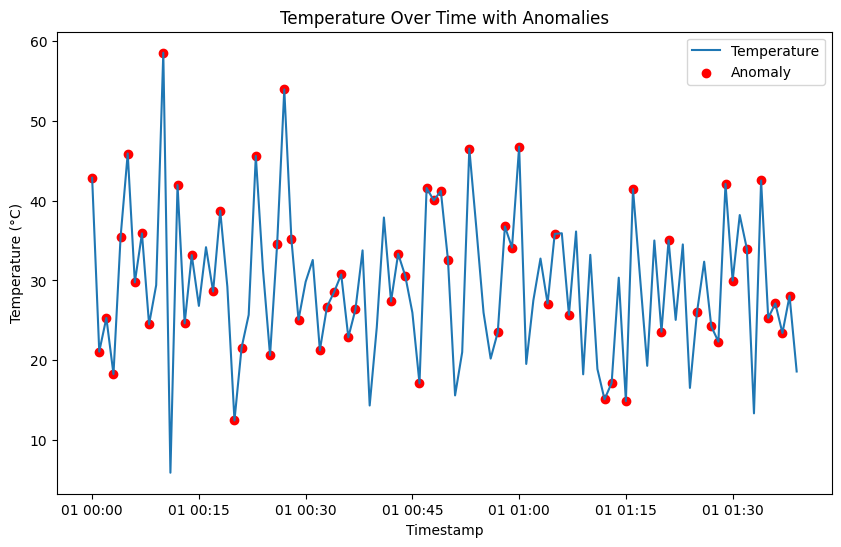

             timestamp  temperature  motion  anomaly
0  2024-08-01 00:00:00    42.869501       0     True
1  2024-08-01 00:01:00    21.075762       0     True
2  2024-08-01 00:02:00    25.298559       0     True
3  2024-08-01 00:03:00    18.251457       0     True
4  2024-08-01 00:04:00    35.460278       0     True
..                 ...          ...     ...      ...
94 2024-08-01 01:34:00    42.530554       1     True
95 2024-08-01 01:35:00    25.291283       0     True
96 2024-08-01 01:36:00    27.109711       0     True
97 2024-08-01 01:37:00    23.401348       0     True
98 2024-08-01 01:38:00    28.065240       0     True

[62 rows x 4 columns]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate collected sensor data over time
data = {
    'timestamp': pd.date_range(start='2024-08-01', periods=100, freq='min'),
    'temperature': np.random.normal(loc=30, scale=10, size=100),
    'motion': np.random.choice([0, 1], size=100)
}

df = pd.DataFrame(data)

# Simple anomaly detection
df['anomaly'] = (df['temperature'] > 40) | (df['motion'] == 0)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['temperature'], label='Temperature')

# Plot anomalies
anomalies = df[df['anomaly']]
plt.scatter(anomalies['timestamp'], anomalies['temperature'], color='red', label='Anomaly')

plt.title('Temperature Over Time with Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Display the anomalies
print(anomalies)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate sensor data
np.random.seed(42)
data = {
    'timestamp': pd.date_range(start='2024-08-01', periods=100, freq='min'),  # Replaced 'T' with 'min'
    'temperature': np.random.normal(loc=30, scale=5, size=100),
    'motion': np.random.choice([0, 1], size=100),
    'humidity': np.random.normal(loc=50, scale=10, size=100),
}

df = pd.DataFrame(data)

# Add an anomaly column for high temperatures or no motion
df['anomaly'] = (df['temperature'] > 40) | (df['motion'] == 0)
df['anomaly'] = df['anomaly'].astype(int)

df.head(11)


,timestamp,temperature,motion,humidity,anomaly
0,2024-08-01 00:00:00,32.483571,0,42.167467,1
1,2024-08-01 00:01:00,29.308678,1,46.779385,0
2,2024-08-01 00:02:00,33.238443,0,58.135172,1
3,2024-08-01 00:03:00,37.615149,0,37.691357,1
4,2024-08-01 00:04:00,28.829233,0,52.274599,1
5,2024-08-01 00:05:00,28.829315,1,63.071428,0
6,2024-08-01 00:06:00,37.896064,1,33.925168,0
7,2024-08-01 00:07:00,33.837174,1,51.846339,0
8,2024-08-01 00:08:00,27.652628,0,52.598828,1
9,2024-08-01 00:09:00,32.712800,0,57.818229,1


### 3. Line Plot: Temperature and Motion Over Time
Visualize temperature over time and highlight anomalies using a line plot.

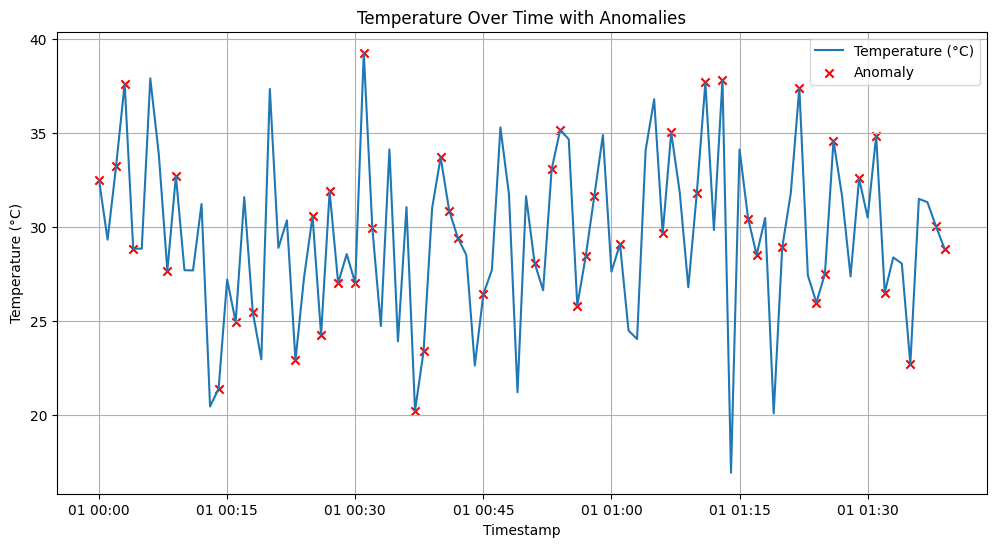

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['temperature'], label='Temperature (°C)')

# Filter both timestamp and temperature columns for anomalies
anomalies = df[df['anomaly'] == 1]
plt.scatter(anomalies['timestamp'], anomalies['temperature'], color='red', label='Anomaly', marker='x')

plt.title('Temperature Over Time with Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


### 4. Heatmap: Correlation Between Different Sensors
A heatmap help visualize the correlation between different sensor readings, such as temperature, motion, and humidity.

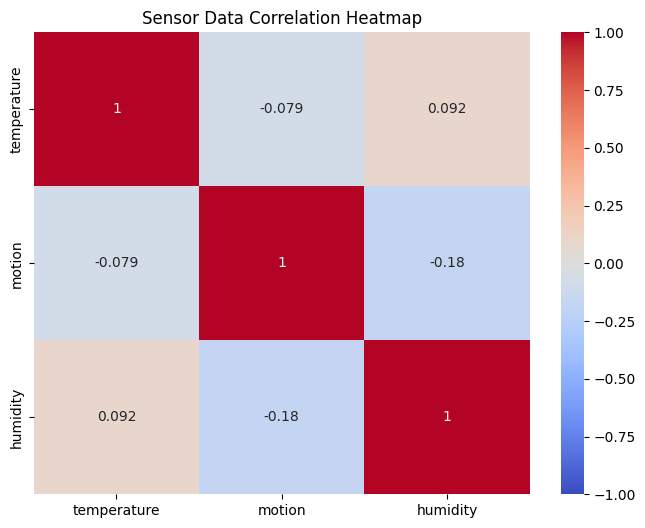

In [4]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['temperature', 'motion', 'humidity']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sensor Data Correlation Heatmap')
plt.show()


### 5. Histogram: Distribution of Temperature Readings
A histogram provides a view of how temperature readings are distributed across the dataset.

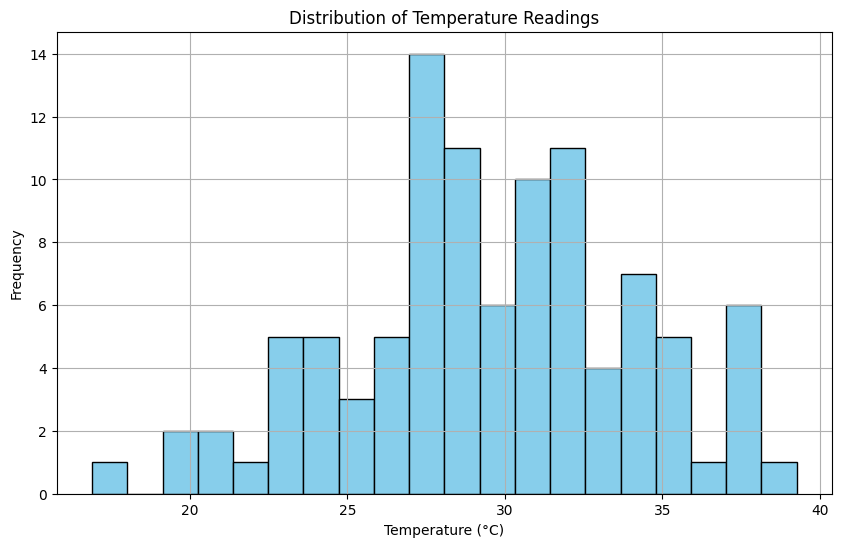

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['temperature'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature Readings')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### 6. Scatter Plot: Temperature vs Humidity
Scatter plots can show the relationship between different sensor readings, such as temperature and humidity.

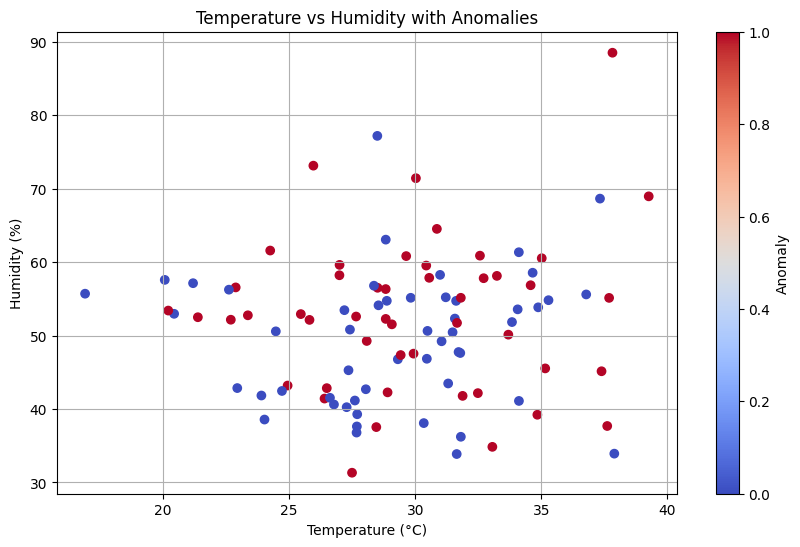

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['temperature'], df['humidity'], c=df['anomaly'], cmap='coolwarm', label='Anomaly')
plt.title('Temperature vs Humidity with Anomalies')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.colorbar(label='Anomaly')
plt.grid(True)
plt.show()


### Heatmap of Anomalies Over Time
To visualize anomalies over time, a heatmap where each row represents a time slice and each column represents different sensors can be helpful.

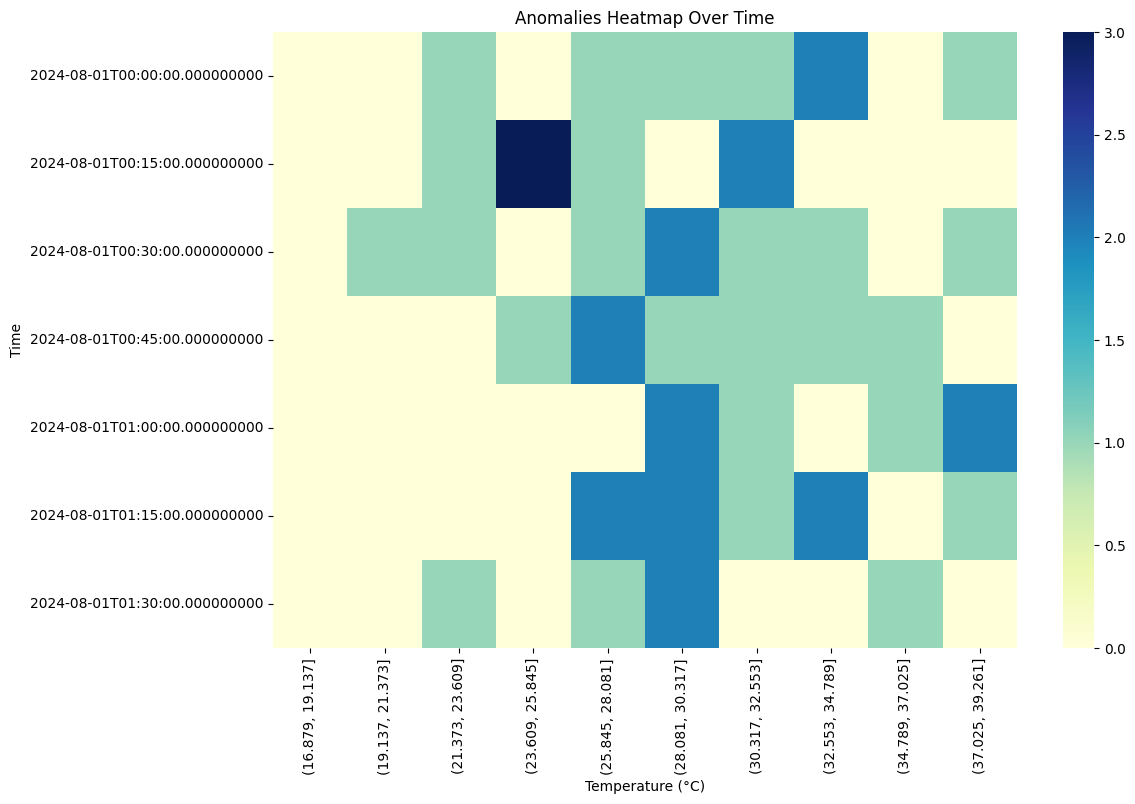

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already defined as in your previous examples

# Create bins for temperature
df['temp_bin'] = pd.cut(df['temperature'], bins=10)

# Create bins for time (e.g., 15-minute intervals)
df['time_bin'] = df['timestamp'].dt.floor('15min')  # Updated 'T' to 'min'

# Create a pivot table for the heatmap
df_heatmap = df.pivot_table(index='time_bin', columns='temp_bin', values='anomaly', aggfunc='sum', observed=False)  # Added observed=False

plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap, cmap="YlGnBu", cbar=True)
plt.title('Anomalies Heatmap Over Time')
plt.xlabel('Temperature (°C)')
plt.ylabel('Time')
plt.show()
